In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import pycaret
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Fuel_cell_performance_data-Full.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


In [ ]:
# Roll number - 102203019
# Target Column - Target5

from pycaret.regression import *

data = df.drop(['Target1', 'Target2', 'Target3', 'Target4'], axis=1)
exp = setup(data = data, target = 'Target5', train_size = 0.7,
            normalize = True, normalize_method = 'robust',
            transformation = True, transformation_method = 'yeo-johnson',
            pca = True, pca_method = 'incremental',
            remove_outliers = True, outliers_threshold = 0.05,
            data_split_shuffle= True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target5
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(965, 16)"
5,Transformed train set shape,"(665, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,52.32


In [ ]:
models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,17.8018,554.3460,23.4211,0.7242,0.5805,0.6032,0.2560
ridge,Ridge Regression,17.8209,554.3989,23.4252,0.7241,0.5818,0.6065,0.2600
lr,Linear Regression,17.8477,554.5605,23.4324,0.7238,0.5829,0.6106,1.3520
lar,Least Angle Regression,17.8477,554.5605,23.4324,0.7238,0.5829,0.6106,0.4490
huber,Huber Regressor,17.2809,579.6961,23.8593,0.7152,0.5338,0.5315,0.4140
lasso,Lasso Regression,17.7484,585.5763,23.9663,0.7123,0.4865,0.5291,0.2570
llar,Lasso Least Angle Regression,17.7484,585.5763,23.9663,0.7123,0.4865,0.5291,0.2600
par,Passive Aggressive Regressor,18.5397,655.3222,25.3747,0.6759,0.6010,0.5871,0.3640
lightgbm,Light Gradient Boosting Machine,18.5780,675.4526,25.7330,0.6672,0.4831,0.4783,0.6310
gbr,Gradient Boosting Regressor,19.0026,709.3642,26.4011,0.6498,0.4738,0.4874,0.5830


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
models = ['xgboost', 'rf', 'dt','ridge','knn', 'et', 'lr','lasso']

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.0504,488.2935,22.0974,0.6892,0.5316,0.5679
1,19.2538,742.7705,27.2538,0.6185,0.4669,0.4460
2,21.3811,1104.2797,33.2307,0.4769,0.4910,0.4184
3,21.5122,1063.2120,32.6069,0.5300,0.5882,0.6781
4,25.0428,1085.5629,32.9479,0.5220,0.5204,0.5799
5,21.5943,961.2390,31.0039,0.5597,0.5075,0.5090
6,17.4037,468.0244,21.6339,0.6210,0.4432,0.4427
7,21.7359,817.7209,28.5958,0.5843,0.5596,0.6599
8,25.5302,1049.7272,32.3995,0.5198,0.5464,0.6289


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,7.1843,297.6560,17.2527,0.8490,0.2753,0.1647


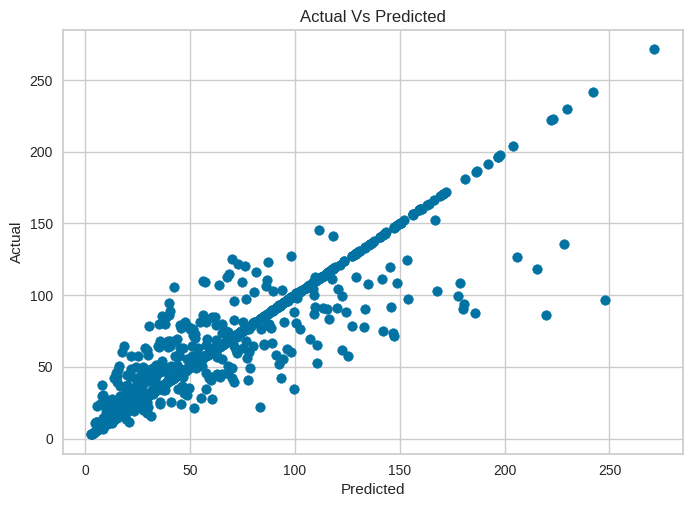

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.4324,501.3577,22.3910,0.6808,0.5531,0.6547
1,19.9415,712.8855,26.6999,0.6339,0.5078,0.5665
2,21.6035,948.1324,30.7918,0.5509,0.5107,0.5387
3,24.7432,1188.6124,34.4763,0.4745,0.6486,0.8235
4,25.0142,1160.1480,34.0609,0.4892,0.5615,0.6345
5,23.4701,1142.1821,33.7962,0.4768,0.5582,0.6237
6,18.3164,486.9222,22.0663,0.6057,0.5103,0.5982
7,21.8333,855.1866,29.2436,0.5653,0.6511,0.8477
8,25.6447,1054.2378,32.4690,0.5177,0.5888,0.7069


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.9297,384.8147,19.6167,0.8048,0.3800,0.3693


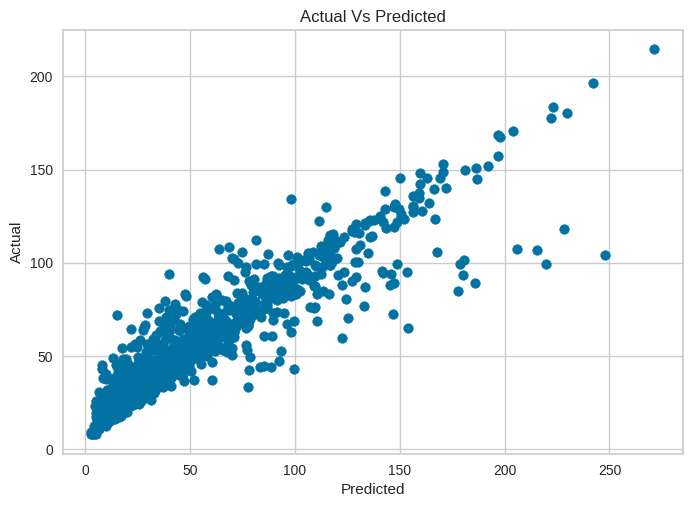

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.8450,1229.7425,35.0677,0.2171,0.6355,0.6414
1,28.3780,1720.1500,41.4747,0.1165,0.8021,0.6568
2,33.4979,2130.6148,46.1586,-0.0093,0.7525,0.8124
3,29.0774,1827.2635,42.7465,0.1922,0.7196,0.7557
4,32.9051,2034.3683,45.1040,0.1043,0.7561,0.7916
5,33.3913,2116.0435,46.0005,0.0308,0.7900,0.8710
6,31.4957,1572.7455,39.6579,-0.2736,0.7849,0.8363
7,36.6043,2332.8258,48.2993,-0.1858,0.8910,1.0822
8,36.9171,2587.8811,50.8712,-0.1839,0.7589,0.7406


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,11.1087,650.6355,25.5076,0.6699,0.4349,0.2692


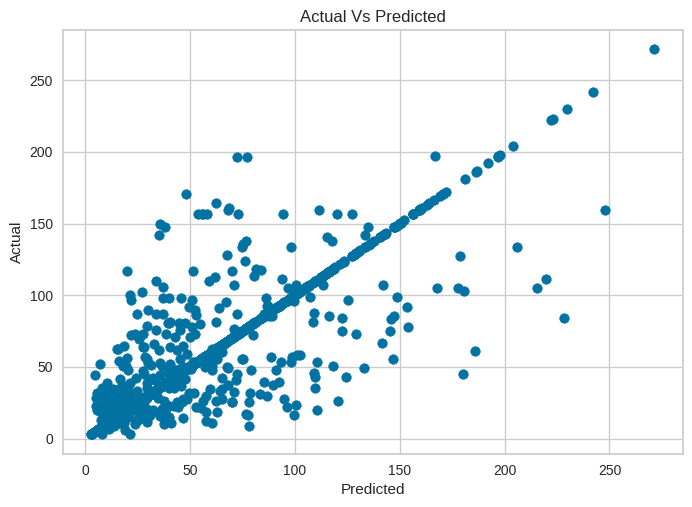

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.7166,362.4049,19.0369,0.7693,0.7673,0.8119
1,17.2057,518.2940,22.7661,0.7338,0.5225,0.5450
2,19.0179,653.5329,25.5643,0.6904,0.5296,0.5784
3,17.2234,619.9763,24.8993,0.7259,0.4856,0.5395
4,20.2361,657.1584,25.6351,0.7107,0.4485,0.4878
5,17.7349,575.8222,23.9963,0.7362,0.6121,0.4884
6,14.9635,356.7252,18.8872,0.7111,0.6392,0.6863
7,19.7749,596.8004,24.4295,0.6966,0.7605,0.9007
8,18.5085,568.0801,23.8344,0.7401,0.5493,0.5392


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,17.6282,540.8124,23.2554,0.7257,0.5521,0.5837


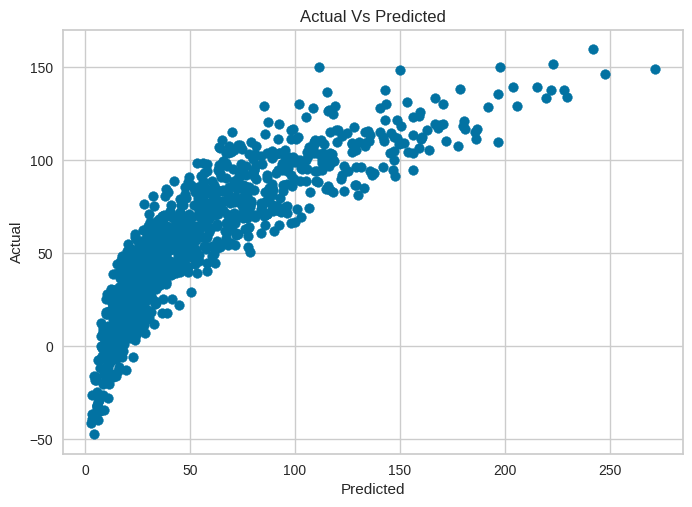

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.2190,427.8985,20.6857,0.7276,0.5917,0.7444
1,25.9185,1141.5282,33.7865,0.4137,0.6185,0.7499
2,23.1324,1115.9457,33.4058,0.4714,0.5050,0.5252
3,22.4230,1016.8802,31.8886,0.5505,0.6134,0.7515
4,25.7340,1208.5020,34.7635,0.4679,0.5643,0.6406
5,20.7149,746.4649,27.3215,0.6581,0.5025,0.5465
6,17.2688,499.8859,22.3581,0.5952,0.4917,0.5535
7,21.3339,960.5516,30.9928,0.5117,0.5795,0.6858
8,23.3724,959.1119,30.9695,0.5612,0.5426,0.5998


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,19.3834,702.2971,26.5009,0.6437,0.4912,0.5358


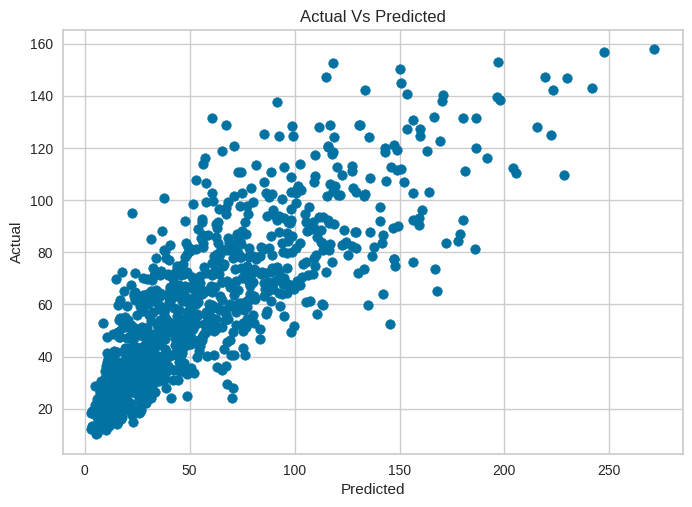

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.3597,392.3416,19.8076,0.7502,0.5174,0.5952
1,19.2114,639.5187,25.2887,0.6715,0.4981,0.5593
2,19.7035,838.5314,28.9574,0.6028,0.4786,0.5123
3,24.0687,1179.6933,34.3467,0.4785,0.6371,0.7992
4,23.5540,979.3658,31.2948,0.5688,0.5308,0.5955
5,21.7698,973.1258,31.1950,0.5543,0.5260,0.5786
6,17.4217,447.3762,21.1513,0.6377,0.5012,0.5863
7,21.6490,818.8690,28.6159,0.5838,0.6367,0.8238
8,24.0234,930.8321,30.5095,0.5742,0.5585,0.6618


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,7.3120,288.3522,16.9809,0.8537,0.3118,0.2078


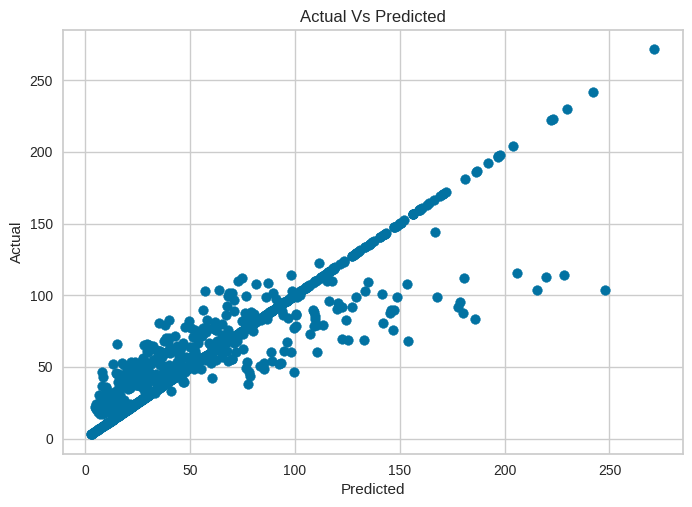

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.8249,366.2995,19.1390,0.7668,0.7641,0.8214
1,17.2152,517.6119,22.7511,0.7341,0.5061,0.5476
2,19.0411,653.1308,25.5564,0.6906,0.5281,0.5818
3,17.2294,618.5545,24.8708,0.7265,0.4888,0.5414
4,20.2667,656.0204,25.6129,0.7112,0.4535,0.4909
5,17.7155,574.7138,23.9732,0.7368,0.6339,0.4901
6,15.0083,359.3948,18.9577,0.7090,0.6343,0.6919
7,19.8484,599.7133,24.4890,0.6952,0.7733,0.9091
8,18.4879,566.0871,23.7926,0.7410,0.5512,0.5424


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,17.6507,540.9616,23.2586,0.7256,0.5509,0.5873


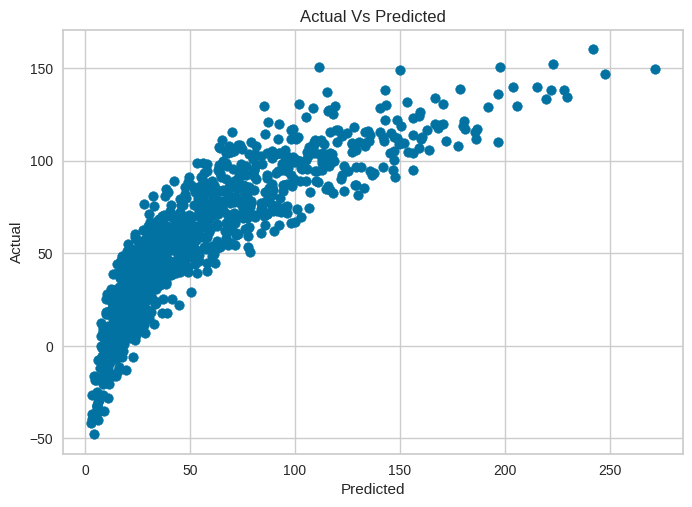

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.5851,290.0493,17.0308,0.8154,0.5789,0.6256
1,17.8605,560.3225,23.6711,0.7122,0.4601,0.5149
2,18.4429,650.1560,25.4982,0.6920,0.4631,0.4736
3,18.2559,716.0893,26.7598,0.6834,0.4532,0.5442
4,19.6708,721.7804,26.8660,0.6822,0.4895,0.4172
5,18.7807,649.6954,25.4891,0.7024,0.4419,0.4754
6,14.7536,330.3346,18.1751,0.7325,0.4807,0.5810
7,18.5143,573.6781,23.9516,0.7084,0.5820,0.7139
8,19.5278,669.0728,25.8664,0.6939,0.4336,0.4835


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,17.6874,583.5248,24.1563,0.7040,0.4785,0.5045


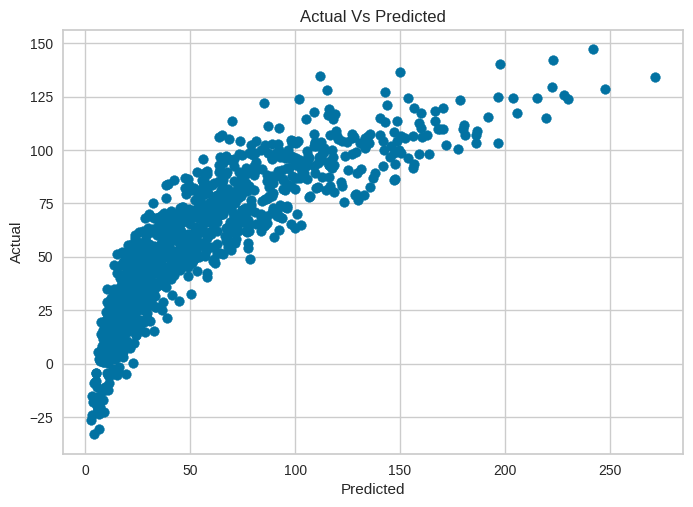

In [ ]:
for x in models:
    train_model = create_model(x)
    predictions = predict_model(train_model, data = data)
    predicted = predictions.iloc[:, -1]
    actual = predictions.iloc[:, -2]

    plt.scatter(actual, predicted)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Actual Vs Predicted')
    plt.show()

In [ ]:
results = []
for x in models:
    train_model = create_model(x)
    predictions = predict_model(train_model, data = data)

    metrics = pull()
    metrics['Model'] = x
    results.append(metrics)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.0504,488.2935,22.0974,0.6892,0.5316,0.5679
1,19.2538,742.7705,27.2538,0.6185,0.4669,0.4460
2,21.3811,1104.2797,33.2307,0.4769,0.4910,0.4184
3,21.5122,1063.2120,32.6069,0.5300,0.5882,0.6781
4,25.0428,1085.5629,32.9479,0.5220,0.5204,0.5799
5,21.5943,961.2390,31.0039,0.5597,0.5075,0.5090
6,17.4037,468.0244,21.6339,0.6210,0.4432,0.4427
7,21.7359,817.7209,28.5958,0.5843,0.5596,0.6599
8,25.5302,1049.7272,32.3995,0.5198,0.5464,0.6289


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,7.1843,297.6560,17.2527,0.8490,0.2753,0.1647


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.4324,501.3577,22.3910,0.6808,0.5531,0.6547
1,19.9415,712.8855,26.6999,0.6339,0.5078,0.5665
2,21.6035,948.1324,30.7918,0.5509,0.5107,0.5387
3,24.7432,1188.6124,34.4763,0.4745,0.6486,0.8235
4,25.0142,1160.1480,34.0609,0.4892,0.5615,0.6345
5,23.4701,1142.1821,33.7962,0.4768,0.5582,0.6237
6,18.3164,486.9222,22.0663,0.6057,0.5103,0.5982
7,21.8333,855.1866,29.2436,0.5653,0.6511,0.8477
8,25.6447,1054.2378,32.4690,0.5177,0.5888,0.7069


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,12.9297,384.8147,19.6167,0.8048,0.3800,0.3693


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.8450,1229.7425,35.0677,0.2171,0.6355,0.6414
1,28.3780,1720.1500,41.4747,0.1165,0.8021,0.6568
2,33.4979,2130.6148,46.1586,-0.0093,0.7525,0.8124
3,29.0774,1827.2635,42.7465,0.1922,0.7196,0.7557
4,32.9051,2034.3683,45.1040,0.1043,0.7561,0.7916
5,33.3913,2116.0435,46.0005,0.0308,0.7900,0.8710
6,31.4957,1572.7455,39.6579,-0.2736,0.7849,0.8363
7,36.6043,2332.8258,48.2993,-0.1858,0.8910,1.0822
8,36.9171,2587.8811,50.8712,-0.1839,0.7589,0.7406


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,11.1087,650.6355,25.5076,0.6699,0.4349,0.2692


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.7166,362.4049,19.0369,0.7693,0.7673,0.8119
1,17.2057,518.2940,22.7661,0.7338,0.5225,0.5450
2,19.0179,653.5329,25.5643,0.6904,0.5296,0.5784
3,17.2234,619.9763,24.8993,0.7259,0.4856,0.5395
4,20.2361,657.1584,25.6351,0.7107,0.4485,0.4878
5,17.7349,575.8222,23.9963,0.7362,0.6121,0.4884
6,14.9635,356.7252,18.8872,0.7111,0.6392,0.6863
7,19.7749,596.8004,24.4295,0.6966,0.7605,0.9007
8,18.5085,568.0801,23.8344,0.7401,0.5493,0.5392


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,17.6282,540.8124,23.2554,0.7257,0.5521,0.5837


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.2190,427.8985,20.6857,0.7276,0.5917,0.7444
1,25.9185,1141.5282,33.7865,0.4137,0.6185,0.7499
2,23.1324,1115.9457,33.4058,0.4714,0.5050,0.5252
3,22.4230,1016.8802,31.8886,0.5505,0.6134,0.7515
4,25.7340,1208.5020,34.7635,0.4679,0.5643,0.6406
5,20.7149,746.4649,27.3215,0.6581,0.5025,0.5465
6,17.2688,499.8859,22.3581,0.5952,0.4917,0.5535
7,21.3339,960.5516,30.9928,0.5117,0.5795,0.6858
8,23.3724,959.1119,30.9695,0.5612,0.5426,0.5998


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,19.3834,702.2971,26.5009,0.6437,0.4912,0.5358


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.3597,392.3416,19.8076,0.7502,0.5174,0.5952
1,19.2114,639.5187,25.2887,0.6715,0.4981,0.5593
2,19.7035,838.5314,28.9574,0.6028,0.4786,0.5123
3,24.0687,1179.6933,34.3467,0.4785,0.6371,0.7992
4,23.5540,979.3658,31.2948,0.5688,0.5308,0.5955
5,21.7698,973.1258,31.1950,0.5543,0.5260,0.5786
6,17.4217,447.3762,21.1513,0.6377,0.5012,0.5863
7,21.6490,818.8690,28.6159,0.5838,0.6367,0.8238
8,24.0234,930.8321,30.5095,0.5742,0.5585,0.6618


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,7.3120,288.3522,16.9809,0.8537,0.3118,0.2078


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.8249,366.2995,19.1390,0.7668,0.7641,0.8214
1,17.2152,517.6119,22.7511,0.7341,0.5061,0.5476
2,19.0411,653.1308,25.5564,0.6906,0.5281,0.5818
3,17.2294,618.5545,24.8708,0.7265,0.4888,0.5414
4,20.2667,656.0204,25.6129,0.7112,0.4535,0.4909
5,17.7155,574.7138,23.9732,0.7368,0.6339,0.4901
6,15.0083,359.3948,18.9577,0.7090,0.6343,0.6919
7,19.8484,599.7133,24.4890,0.6952,0.7733,0.9091
8,18.4879,566.0871,23.7926,0.7410,0.5512,0.5424


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,17.6507,540.9616,23.2586,0.7256,0.5509,0.5873


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,13.5851,290.0493,17.0308,0.8154,0.5789,0.6256
1,17.8605,560.3225,23.6711,0.7122,0.4601,0.5149
2,18.4429,650.1560,25.4982,0.6920,0.4631,0.4736
3,18.2559,716.0893,26.7598,0.6834,0.4532,0.5442
4,19.6708,721.7804,26.8660,0.6822,0.4895,0.4172
5,18.7807,649.6954,25.4891,0.7024,0.4419,0.4754
6,14.7536,330.3346,18.1751,0.7325,0.4807,0.5810
7,18.5143,573.6781,23.9516,0.7084,0.5820,0.7139
8,19.5278,669.0728,25.8664,0.6939,0.4336,0.4835


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,17.6874,583.5248,24.1563,0.7040,0.4785,0.5045


In [ ]:
final_result = pd.concat(results)
final_result = final_result[['Model', 'R2', 'MAE', 'MSE','RMSE','MAPE']]
final_result = final_result.sort_values(by='R2', ascending=False)
display(final_result)

#Upon evaluating extra trees regressor gave the best R^2 score followed by xgboost and random forest which are different ensemble techniques.

,Model,R2,MAE,MSE,RMSE,MAPE
0,et,0.8537,7.3120,288.352200,16.980900,0.2078
0,xgboost,0.8490,7.1843,297.656006,17.252701,0.1647
0,rf,0.8048,12.9297,384.814700,19.616700,0.3693
0,ridge,0.7257,17.6282,540.812400,23.255400,0.5837
0,lr,0.7256,17.6507,540.961600,23.258600,0.5873
0,lasso,0.7040,17.6874,583.524800,24.156300,0.5045
0,dt,0.6699,11.1087,650.635500,25.507600,0.2692
0,knn,0.6437,19.3834,702.297119,26.500900,0.5358
